In [1]:
#importing the dependencies
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 
from sklearn.cluster import KMeans

In [2]:
data = pd.read_csv('Mall_Customers.csv')

In [3]:
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [5]:
data.shape  

(200, 5)

In [6]:
data.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [7]:
data['Gender'].value_counts(normalize=True).apply(lambda x: f'{x*100:.0f}%')

Gender
Female    56%
Male      44%
Name: proportion, dtype: object

In [8]:
data['Gender'].value_counts()

Gender
Female    112
Male       88
Name: count, dtype: int64

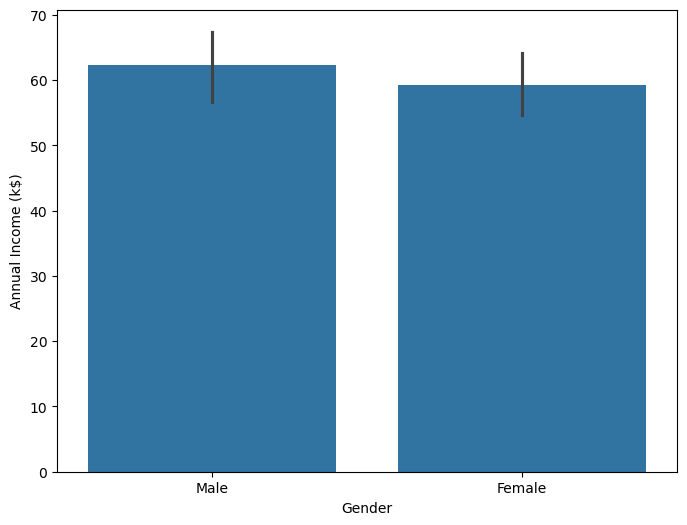

In [9]:
# Plotting Gender and Annual Income (K$)
plt.figure(figsize=(8, 6))
sns.barplot(data=data, x='Gender', y='Annual Income (k$)');

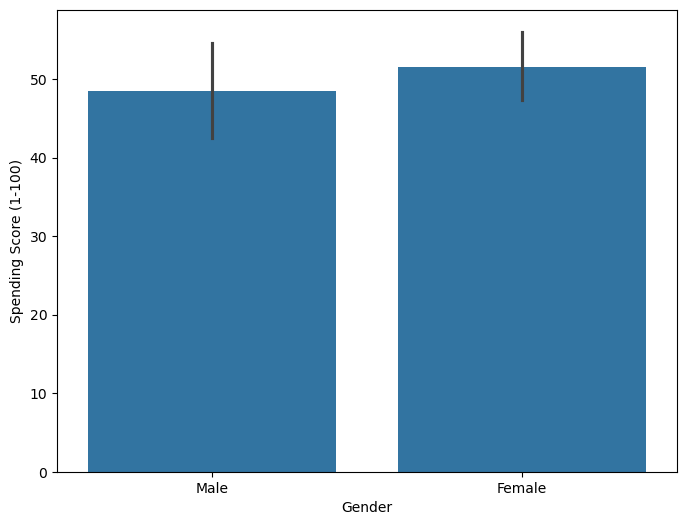

In [10]:
# Plotting Gender and Spending Score (1-100)
plt.figure(figsize=(8, 6))
sns.barplot(data=data, x='Gender', y='Spending Score (1-100)');

Choosing the right column(s) to perform clustering.

In this case the Annual Income and Spending Score column will be used as the two columns 
will give a better insights into the spending score.

In [12]:
#x = data.iloc[:, [3, 4]].values
#x

In [13]:

# Selecting the specified columns to use for clustering
x = data[['Annual Income (k$)', 'Spending Score (1-100)']].values

In [14]:
x

array([[ 15,  39],
       [ 15,  81],
       [ 16,   6],
       [ 16,  77],
       [ 17,  40],
       [ 17,  76],
       [ 18,   6],
       [ 18,  94],
       [ 19,   3],
       [ 19,  72],
       [ 19,  14],
       [ 19,  99],
       [ 20,  15],
       [ 20,  77],
       [ 20,  13],
       [ 20,  79],
       [ 21,  35],
       [ 21,  66],
       [ 23,  29],
       [ 23,  98],
       [ 24,  35],
       [ 24,  73],
       [ 25,   5],
       [ 25,  73],
       [ 28,  14],
       [ 28,  82],
       [ 28,  32],
       [ 28,  61],
       [ 29,  31],
       [ 29,  87],
       [ 30,   4],
       [ 30,  73],
       [ 33,   4],
       [ 33,  92],
       [ 33,  14],
       [ 33,  81],
       [ 34,  17],
       [ 34,  73],
       [ 37,  26],
       [ 37,  75],
       [ 38,  35],
       [ 38,  92],
       [ 39,  36],
       [ 39,  61],
       [ 39,  28],
       [ 39,  65],
       [ 40,  55],
       [ 40,  47],
       [ 40,  42],
       [ 40,  42],
       [ 42,  52],
       [ 42,  60],
       [ 43,

In [15]:
#Choosing tht right number clusters
#WCSS = within clusters sum of squares
#finding the WCSS value for different number of clusters

# writing a loop and for each case it will find the wcss value for each cluster

wcss = []
for i in range(1, 10):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
    OMP_NUM_THREADS=1


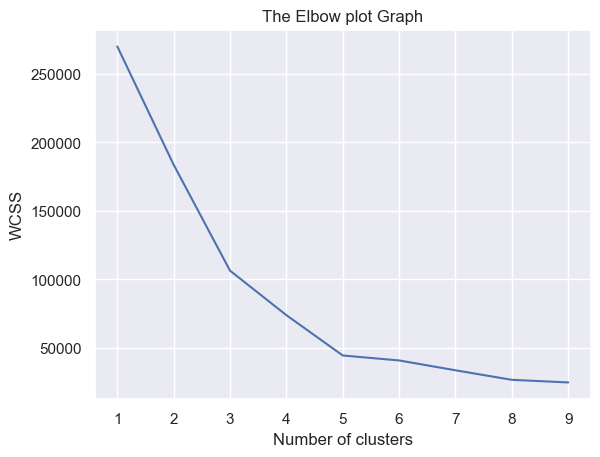

In [16]:
#Plotting elbow graph 
sns.set()
plt.plot(range(1, 10), wcss)
plt.title('The Elbow plot Graph')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [17]:
#Training the KMeans clustering

kmeans = KMeans(n_clusters = 5, init = 'k-means++', random_state = 0)

In [18]:
#returning a label for each data point based on their clusters
y = kmeans.fit_predict(x)

In [19]:
print(y)

[3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3
 4 3 4 3 4 3 0 3 4 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 2 1 0 1 2 1 2 1 0 1 2 1 2 1 2 1 2 1 0 1 2 1 2 1
 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2
 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1]


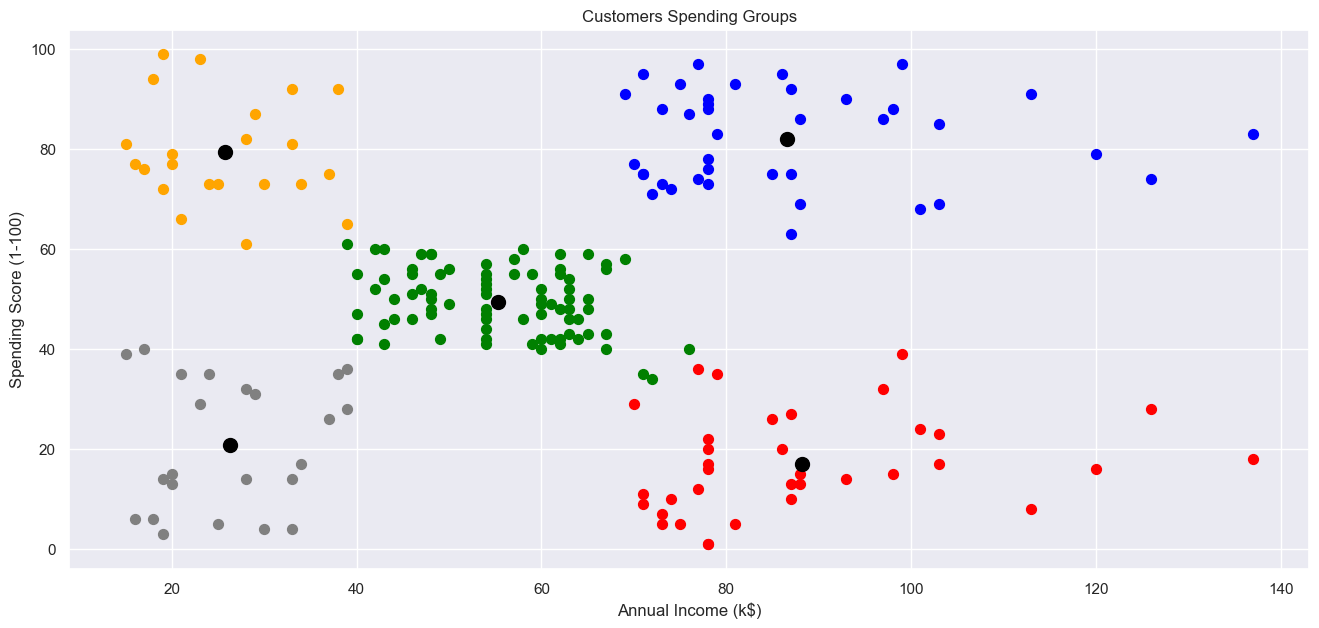

In [20]:
#Visualizing the Clusters

plt.figure(figsize = (16, 7))
plt.scatter(x[y ==0, 0], x[y ==0, 1], s = 50, c = 'green', label = 'Cluster 1')
plt.scatter(x[y ==1, 0], x[y ==1, 1], s = 50, c = 'blue', label = 'Cluster 2')
plt.scatter(x[y ==2, 0], x[y ==2, 1], s = 50, c = 'red', label = 'Cluster 3')
plt.scatter(x[y ==3, 0], x[y ==3, 1], s = 50, c = 'grey', label = 'Cluster 4')
plt.scatter(x[y ==4, 0], x[y ==4, 1], s = 50, c = 'orange', label = 'Cluster 5')

#plot the centroids
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s = 100, c = 'black', label = 'Centroids')

plt.title('Customers Spending Groups')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.show()